In [1]:
# import libraries:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import SGD, adam
from keras.models import load_model
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import time 
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from IPython.display import Image
os.chdir(r'C:\\Users\\hp\\Desktop\\conda codes\\Data')
warnings.filterwarnings('ignore')


Using TensorFlow backend.


# Artificial Neural Network:

#### An artificial neural network is an interconnected group of nodes, inspired by a simplification of neurons in a brain.
#### Here, each circular node represents an artificial neuron and an arrow represents a connection from the output of one 
#### artificial neuron to the input of another.

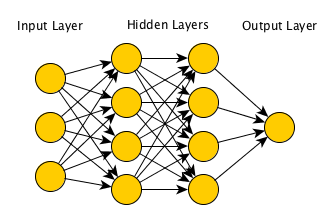

In [2]:
# Architecture of NN:
Image(filename='NNN.png')

## Data Prepartion and Split:

In [3]:
# Load DataSet: 
df=pd.read_excel('output.xlsx', index=False)   # output of preprocessed data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3579 entries, 0 to 3578
Data columns (total 15 columns):
Unnamed: 0        3579 non-null int64
P.Dia (in)        3579 non-null float64
SL (in)           3579 non-null int64
SPM (spm)         3579 non-null float64
B.Weight (lbf)    3579 non-null float64
Fillage (%)       3579 non-null float64
PD (ft)           3579 non-null int64
PIP (psi)         3579 non-null float64
PPMPL (lb)        3579 non-null int64
MPMPL (lb)        3579 non-null int64
Friction (lb)     3579 non-null float64
PRHP              3579 non-null float64
Fillage_low       3579 non-null int64
Fillage_medium    3579 non-null int64
Fillage_high      3579 non-null int64
dtypes: float64(7), int64(8)
memory usage: 419.5 KB


In [5]:
# Drop unrequired columns & explore data:
df = df.drop(['Unnamed: 0','Fillage (%)','PD (ft)','MPMPL (lb)'], axis=1)
df.head()

,P.Dia (in),SL (in),SPM (spm),B.Weight (lbf),PIP (psi),PPMPL (lb),Friction (lb),PRHP,Fillage_low,Fillage_medium,Fillage_high
0,2.25,112,6.7,4885.0,494.00000,1550,174.0,3.6,0,0,1
1,2.25,112,6.7,4885.0,527.00000,1864,36.0,3.7,0,0,1
2,2.25,112,6.7,4885.0,505.00000,1793,81.0,2.5,0,0,1
3,2.25,128,8.2,3257.0,445.20227,2072,159.0,5.6,0,0,1
4,2.25,128,8.2,3257.0,160.00000,2485,524.0,7.3,0,0,1


In [6]:
## TO scale data, will use scaling or standarization features for numerical columns & one hot coding for categorial ones:
## Scaling option:

# num_df=df.drop(['Fillage_low','Fillage_medium','Fillage_high','PRHP'], axis=1)
# num_values = num_df.values #returns a numpy array to be processed by MinMAx Scaler
# scaler_x=MinMaxScaler(feature_range=(0,1))
# scaler_x.fit(num_values)
# num_values_scaled=scaler_x.transform(num_values)
# num_df_scaled = pd.DataFrame(num_values_scaled, columns=['P.Dia (in)', 'SL (in)', 'SPM (spm)', 'B.Weight (lbf)', 'PIP (psi)',
#        'PPMPL (lb)', 'Friction (lb)'])
# num_df_scaled.head()

# cat_df_encoded=df[['Fillage_low','Fillage_medium','Fillage_high']]    # one hot coding already applied 

# label_df=df['PRHP']
# scaler_y=MinMaxScaler(feature_range=(0,1))
# scaler_y.fit(label_df.values.reshape(-1,1))
# prhp_values_scaled=scaler_y.transform(label_df.values.reshape(-1,1))
# label_df=pd.DataFrame(prhp_values_scaled, columns=['PRHP'])

# # label_df=df['PRHP']/df['PRHP'].max()                                  # Scale or not ?????


# df=pd.concat([num_df_scaled,cat_df_encoded, label_df], axis=1)
# df.head()


In [7]:
# Normalization option:
num_df=df.drop(['Fillage_low','Fillage_medium','Fillage_high','PRHP'], axis=1)      
num_df_norm=(num_df-num_df.mean())/(num_df.std())                              # Tensorflow tutourials 
# num_df_norm=(num_df-num_df.mean())/(num_df.std()+1e-7)                       # Stackoverflow reply


cat_df_encoded=df[['Fillage_low','Fillage_medium','Fillage_high']]             # one hot coding already applied 

label_df=df['PRHP']
# label_df=df['PRHP']/df['PRHP'].max()                                        # Scale or not ?????
df=pd.concat([num_df_norm,cat_df_encoded, label_df], axis=1)
df.head()

,P.Dia (in),SL (in),SPM (spm),B.Weight (lbf),PIP (psi),PPMPL (lb),Friction (lb),Fillage_low,Fillage_medium,Fillage_high,PRHP
0,0.8081,-0.177321,-0.187455,-1.520043,0.296125,-1.458739,-0.946448,0,0,1,3.6
1,0.8081,-0.177321,-0.187455,-1.520043,0.415134,-1.343796,-1.041267,0,0,1,3.7
2,0.8081,-0.177321,-0.187455,-1.520043,0.335795,-1.369786,-1.010348,0,0,1,2.5
3,0.8081,0.251556,0.832875,-1.972893,0.120145,-1.267656,-0.956755,0,0,1,5.6
4,0.8081,0.251556,0.832875,-1.972893,-0.908387,-1.116473,-0.705967,0,0,1,7.3


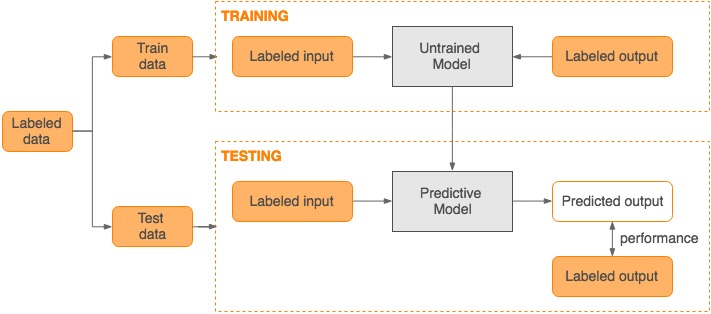

In [8]:
# Spliting data to train & test Concept :
Image('train_test_detail.png')

In [9]:
# Spliting data to train & test :
(train_data, test_data) = train_test_split(df, test_size=0.15, random_state=42)
print('Data divided as following :{} points for training and {} points for testing'.format(len(train_data), len(test_data)))

Data divided as following :3042 points for training and 537 points for testing


In [10]:
# Split data into features & labels:
train_data_features=train_data.drop('PRHP', axis=1)
train_data_labels=train_data['PRHP']
train_data_labels=pd.DataFrame(train_data_labels,  columns=['PRHP'])
test_data_features=test_data.drop('PRHP', axis=1)
test_data_labels=test_data['PRHP']
# test_data_labels=pd.DataFrame(train_data_labels,  columns=['PRHP'])
print('Data separated into {} inputs and {} output'.format(train_data_features.shape[1],train_data_labels.shape[1]))

Data separated into 10 inputs and 1 output


In [11]:
# Forcing same random inputs for reproducibility of model:
os.environ['PYTHONHASHEED']='0'
np.random.seed(37)
random.seed(1254)
tf.set_random_seed(89)
# sess=tf.Session(graph=tf.get_default_graph(),config='session_conf')     # cause error
# k.set_session(sess)

## Model Development and Performance:

In [12]:
# Build Model:
model=Sequential()
model.add(Dense(9,input_shape=(train_data_features.shape[1],), activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 9)                 99        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [13]:
# train Model:
start= time.time()
model.compile(optimizer=adam(lr=1e-3),loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(train_data_features,train_data_labels,validation_split=0.2,batch_size=10,epochs=100,verbose=0,shuffle=True)
end= time.time()
print('Completed training the model.....')
print('Training time :', round((end-start),2), 'Seconds')

Instructions for updating:
Use tf.cast instead.
Completed training the model.....
Training time : 25.21 Seconds


In [14]:
# model performance: 
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,val_loss,val_mean_absolute_error,loss,mean_absolute_error,epoch
0,166.349358,10.173714,205.891869,11.572301,0
1,49.047411,5.001500,114.684807,8.092193,1
2,17.343447,2.700172,26.410262,3.575243,2
3,11.964707,2.065626,12.521779,2.329527,3
4,10.864938,1.909736,9.867615,2.007360,4


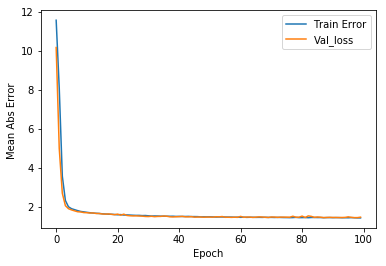

In [15]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error ')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val_loss')
  plt.legend()
  plt.show()

plot_history(history)

In [16]:
## Stop training if no improvement in validation loss:
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
# history= model.fit(train_data_features,train_data_labels,validation_split=0.1,
#                    batch_size=10,epochs=100,verbose=2,shuffle=True, callbacks=[early_stop])


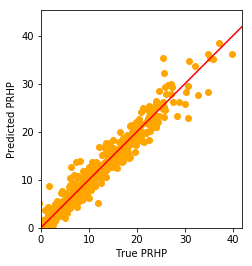

In [17]:
# Using Model for predictions:
predictions= model.predict(test_data_features, batch_size=10)

# Comparing with actual labels:
plt.scatter(test_data_labels, predictions, color='orange')
plt.xlabel('True PRHP')
plt.ylabel('Predicted PRHP')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100], color='red')

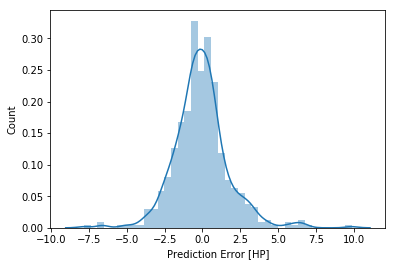

In [18]:
# Distribution of Error check:
test_data_labels=pd.DataFrame(test_data_labels)
error = predictions - test_data_labels
plt.xlabel("Prediction Error [HP]")
plt.ylabel("Count")
sns.distplot(error)

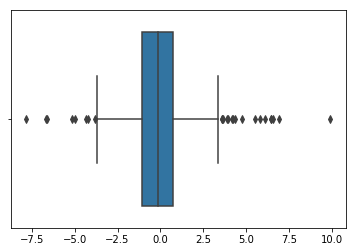

In [19]:
sns.boxplot(error)

In [20]:
# compute the mean and standard deviation of the absolute percentage error:
error_perc = (predictions / test_data_labels) 
abs_error_perc = np.abs(error_perc)

mean_error = np.mean(abs_error_perc)
std_error= np.std(abs_error_perc)

 # require more check from pyimage example
 
print ('Mean perc_error = {},and Std deviation of perc_error = {}'.format(mean_error[0].round(2),std_error[0].round(2))) 

Mean perc_error = 1.09,and Std deviation of perc_error = 0.84


In [21]:
# Save Model & Recall model:
# model.save('Initial_model.h5')

In [22]:
# Prediction on new data: 

## Tuning Hyperparameters of Model :

In [23]:
# Run ANN Model (Hyper-parameters selections), Get best parameters and check new model performance :
######### Need Figur to show hyper parameters